In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

1. Using lemonade.csv dataset and focusing on continuous variables:

In [2]:
lemonade = pd.read_csv('lemonade.csv')
lemonade.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [3]:
lemonade.shape

(365, 7)

In [4]:
lemonade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [5]:
lemonade.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.589041
std,18.085892,0.273890,13.786445,0.0,29.979680
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


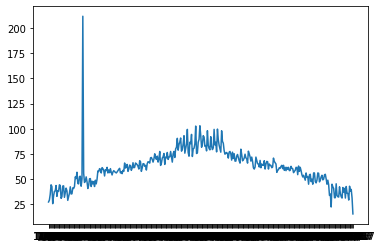

In [6]:
plt.plot(lemonade.Date, lemonade.Temperature)

In [7]:
lemonade[lemonade.Temperature > 90]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21
154,6/4/17,Sunday,90.4,0.51,43,0.5,38
158,6/8/17,Thursday,90.7,0.50,46,0.5,39
162,6/12/17,Monday,93.0,0.50,67,0.5,40
166,6/16/17,Friday,99.3,0.47,77,0.5,41
171,6/21/17,Wednesday,94.3,0.47,76,0.5,41
176,6/26/17,Monday,102.6,0.47,60,0.5,42
181,7/1/17,Saturday,102.9,0.47,59,0.5,43
182,7/2/17,Sunday,93.4,0.51,68,0.5,38
185,7/5/17,Wednesday,93.0,0.40,55,0.5,99


In [8]:
# .loc is finding the row where the temp was exactly 212.
# 2nd argument to .loc is the column e.g. "Temperature"
# right of equals, we are assigning the temperature from the day before
lemonade.loc[lemonade.Temperature == 212, "Temperature"] = lemonade.iloc[40].Temperature

In [9]:
lemonade.iloc[40].Temperature

50.0

In [10]:
lemonade.iloc[41]

Date            2/11/17
Day            Saturday
Temperature          50
Rainfall           0.91
Flyers               35
Price               0.5
Sales                21
Name: 41, dtype: object

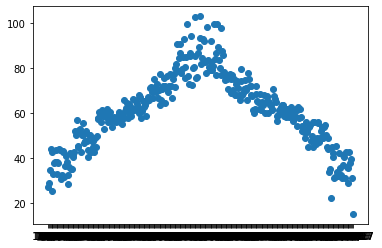

In [11]:
plt.scatter(lemonade.Date, lemonade.Temperature)

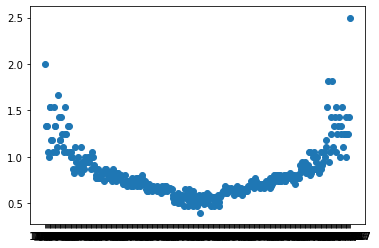

In [12]:
plt.scatter(lemonade.Date, lemonade.Rainfall)

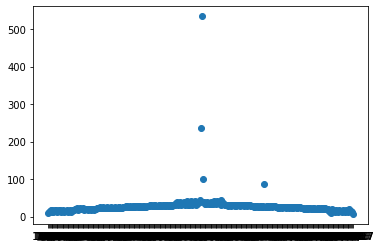

In [13]:
plt.scatter(lemonade.Date, lemonade.Sales)

In [14]:
lemonade[lemonade.Sales > 50]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534
185,7/5/17,Wednesday,93.0,0.40,55,0.5,99
258,9/16/17,Saturday,68.1,0.69,37,0.5,87


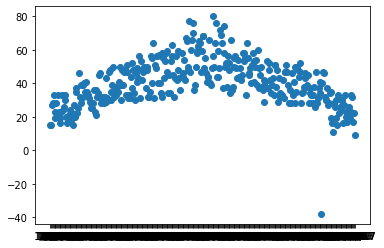

In [15]:
plt.scatter(lemonade.Date, lemonade.Flyers)

In [16]:
lemonade[lemonade.Flyers < 0]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


In [17]:
# show dates around the target dates
lemonade.iloc[320:330]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
320,11/17/17,Friday,46.0,1.00,31,0.5,20
321,11/18/17,Saturday,48.7,1.05,37,0.5,19
322,11/19/17,Sunday,55.9,0.87,34,0.5,23
323,11/20/17,Monday,55.6,0.87,41,0.5,22
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20
325,11/22/17,Wednesday,48.7,1.00,40,0.5,19
326,11/23/17,Thursday,51.9,0.87,47,0.5,23
327,11/24/17,Friday,53.6,0.83,46,0.5,22
328,11/25/17,Saturday,49.0,0.91,32,0.5,20
329,11/26/17,Sunday,49.7,1.05,30,0.5,19


In [18]:
# replace the negative flyer count to positive
# left side is the column and location of the variable to change
# right side is the absolute value of the incorrect temperature
lemonade.loc[lemonade.Flyers == -38, "Flyers"] = abs(lemonade.loc[lemonade.Flyers == -38, 'Flyers'])

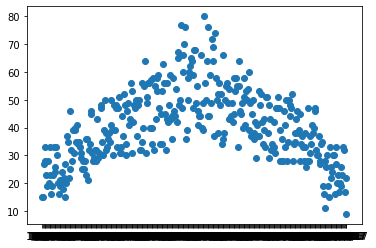

In [19]:
plt.scatter(lemonade.Date, lemonade.Flyers)

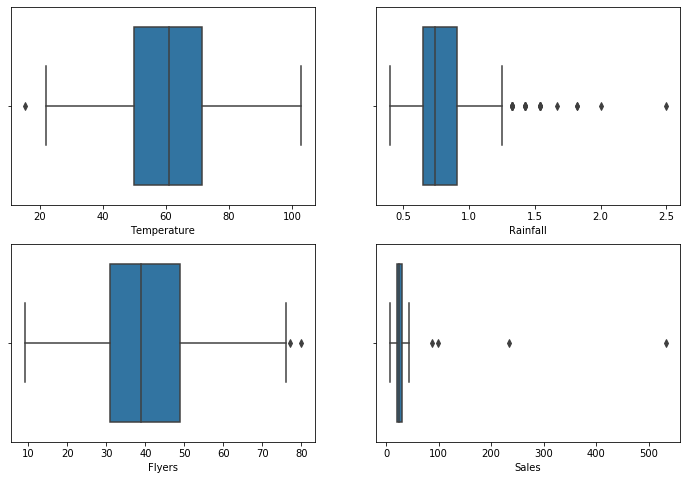

In [20]:
plt.figure(figsize=(12, 8))
plt.subplot(221)
sns.boxplot(lemonade.Temperature)
plt.subplot(222)
sns.boxplot(lemonade.Rainfall)
plt.subplot(223)
sns.boxplot(lemonade.Flyers)
plt.subplot(224)
sns.boxplot(lemonade.Sales)
plt.show()

- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

In [21]:
# get the first(25%) and the third (75%) quartile
# iqr the distance between 3rd and 1st quartile
q1 = lemonade.quantile(.25)
q3 = lemonade.quantile(.75)

iqr = q3 - q1
iqr

Temperature    21.60
Rainfall        0.26
Flyers         18.00
Price           0.00
Sales          10.00
dtype: float64

### Lower Inner Bound

In [22]:
# the lower bound is the the 1st quartile - the iqr times 1.5 or the distance between 3rd and 1st quartile time 1.5
lower_inner_bound = q1 - iqr * 1.5
lower_inner_bound

Temperature    17.30
Rainfall        0.26
Flyers          4.00
Price           0.50
Sales           5.00
dtype: float64

In [23]:
# Temperature's lower bound
lower_inner_bound.Temperature

17.30000000000001

In [24]:
# Flyers's lower bound
lower_inner_bound.Flyers

4.0

In [25]:
# Rainfall's lower bound
lower_inner_bound.Rainfall

0.26

In [26]:
# Sales's lower bound
lower_inner_bound.Sales

5.0

In [27]:
# <font color=green>since they are above 0.00 I believe it makes sense to keep them all.</font>

### Upper Inner Bounds

- Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

In [28]:
upper_inner_bound = q3 + iqr * 1.5
upper_inner_bound

Temperature    103.7
Rainfall         1.3
Flyers          76.0
Price            0.5
Sales           45.0
dtype: float64

In [29]:
# Temperature's lower bound
upper_inner_bound.Temperature

103.69999999999999

In [30]:
# Flyers's lower bound
upper_inner_bound.Flyers

76.0

In [31]:
# Rainfall's lower bound
upper_inner_bound.Rainfall

1.3

In [32]:
# Sales's lower bound
upper_inner_bound.Sales

45.0

<font color=green>since they are all still reasonable measures I believe it makes sense to keep them all.</font>

### Lower Outer Bound

- Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?

In [33]:
lower_outer_bound = q1 - iqr * 3
lower_outer_bound

Temperature   -15.10
Rainfall       -0.13
Flyers        -23.00
Price           0.50
Sales         -10.00
dtype: float64

In [34]:
# Temperature's lower bound
lower_outer_bound.Temperature

-15.09999999999998

In [35]:
# Flyers's lower bound
lower_outer_bound.Flyers

-23.0

In [36]:
# Rainfall's lower bound
lower_outer_bound.Rainfall

-0.13

In [37]:
# Sales's lower bound
lower_outer_bound.Sales

-10.0

<font color=green>You can have a negative temperature and price is above 0.0, I would keep these</font>

<font color=red>You cannot really have neagtive measures for rainfall, flyers, or sales. Any measure below 0 can be dropped</font>

### Upper Outer Bound

- Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [38]:
upper_outer_bound = q3 + iqr * 3
upper_outer_bound

Temperature    136.10
Rainfall         1.69
Flyers         103.00
Price            0.50
Sales           60.00
dtype: float64

In [39]:
# Temperature's lower bound
upper_outer_bound.Temperature

136.09999999999997

In [40]:
# Flyers's lower bound
upper_outer_bound.Flyers

103.0

In [41]:
# Rainfall's lower bound
upper_outer_bound.Rainfall

1.69

In [42]:
# Sales's lower bound
upper_outer_bound.Sales

60.0

<font color=green>Raiinfall, flyers, price, and sales are resonable, I would keep these</font>

<font color=red>You can have high temperature but anything much higher then is too high and can be dropped</font>

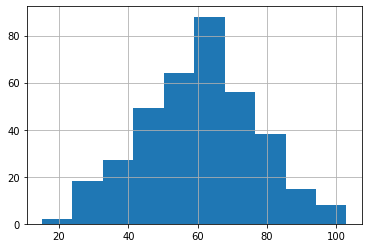

In [43]:
lemonade.Temperature.hist()

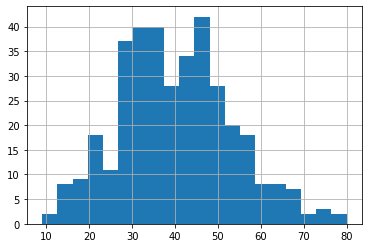

In [44]:
lemonade.Flyers.hist(bins=20)

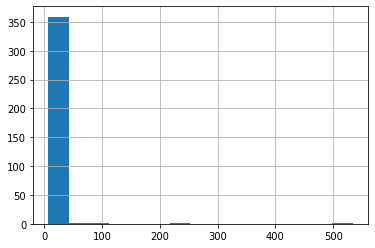

In [45]:
lemonade.Sales.hist(bins=15)

In [46]:
# find all of the sales that are within 3 std
lemonade['Sales_zscores'] = pd.Series((lemonade.Sales - lemonade.Sales.mean()) / lemonade.Sales.std())

In [47]:
# find all of the temperature that are within 3 std
lemonade['Temperature_zscores'] = pd.Series((lemonade.Temperature - lemonade.Temperature.mean()) / lemonade.Temperature.std())

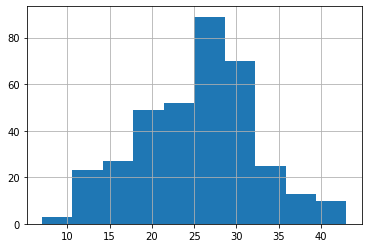

In [48]:
lemonade[lemonade.Sales_zscores.abs() <= 1.5].Sales.hist()

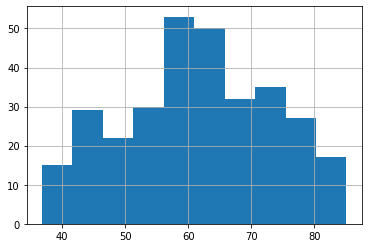

In [49]:
lemonade[lemonade.Temperature_zscores.abs() <= 1.5].Temperature.hist()

2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:



- Use a 2 sigma decision rule to isolate the outliers.
    - Do these make sense?
    - Should certain outliers be kept or removed?

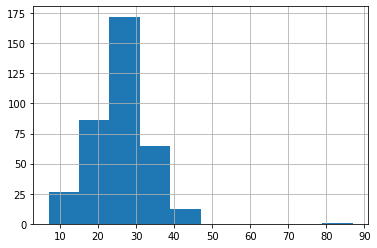

In [50]:
# All of the rows that are 2 or less standard deviations of sales away from the mean
lemonade[lemonade.Sales_zscores.abs() <= 2].Sales.hist()

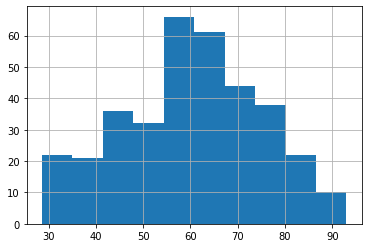

In [51]:
# All of the rows that are 2 or less standard deviations of temperatures away from the mean
lemonade[lemonade.Temperature_zscores.abs() <= 2].Temperature.hist()

3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

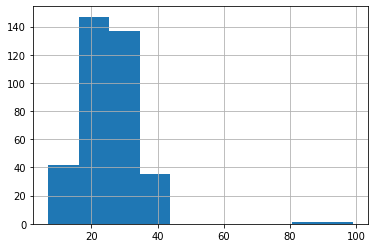

In [52]:
lemonade[lemonade.Sales_zscores.abs() <= 3].Sales.hist()

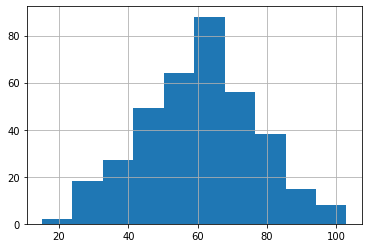

In [53]:
lemonade[lemonade.Temperature_zscores.abs() <= 3].Temperature.hist()